<a href="https://colab.research.google.com/github/eramii/eramii/blob/main/%EC%A3%BC%EC%8B%9D_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install prophet

In [4]:
pip install plotly

In [5]:
pip install pandas openpyxl

In [16]:
import pandas as pd

# 엑셀 파일 불러오기
excel_file_path = input("파일 경로를 입력하세요: ")
df = pd.read_excel(excel_file_path)

# "Date" 열을 datetime 형식으로 변환 (이미 datetime 형식이라면 이 부분은 생략 가능)
df['Date'] = pd.to_datetime(df['Date'])

# 데이터 기간 설정
start_date = '2020-01-01'
end_date = '2023-10-27'

# 조건을 만족하는 행만 선택
selected_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# 선택된 데이터 확인
print(selected_df.head())

파일 경로를 입력하세요: /content/04.xlsx
        Date    Open    High     Low   Close      Adj Close  Volume
0 2020-01-02  187500  188000  182000  182500  181167.046875  300640
1 2020-01-03  185000  186000  180500  181500  180174.359375  454492
2 2020-01-06  180000  182000  178000  180500  179181.656250  287970
3 2020-01-07  182500  187000  181500  187000  185634.187500  328624
4 2020-01-08  182000  183500  179000  183000  181663.406250  820867


In [17]:
from prophet import Prophet

df_train = df[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4149xvwr/hk07kkk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4149xvwr/x_1qub30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92143', 'data', 'file=/tmp/tmp4149xvwr/hk07kkk6.json', 'init=/tmp/tmp4149xvwr/x_1qub30.json', 'output', 'file=/tmp/tmp4149xvwr/prophet_modelfave0g18/prophet_model-20231203120907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


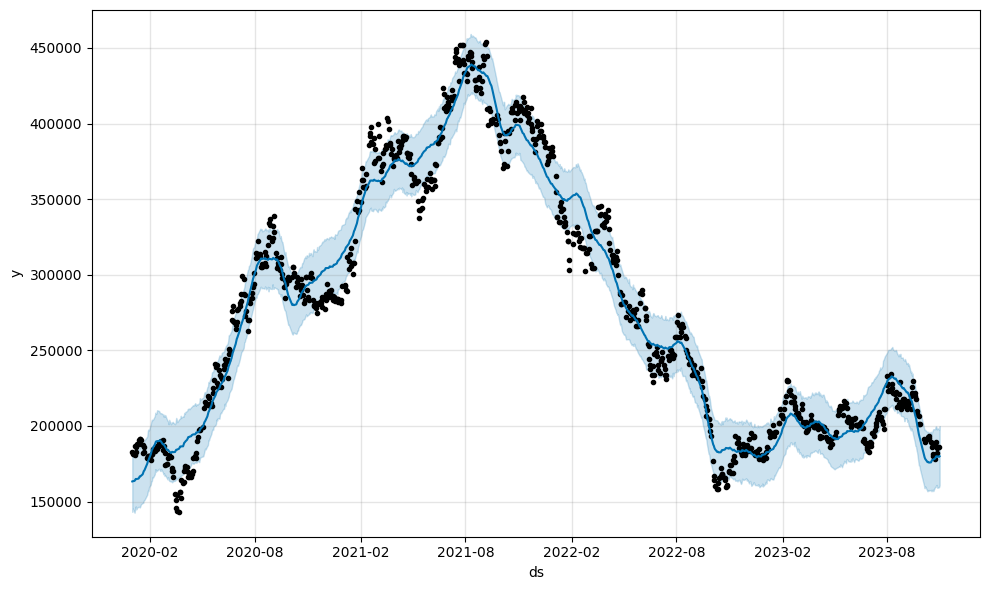

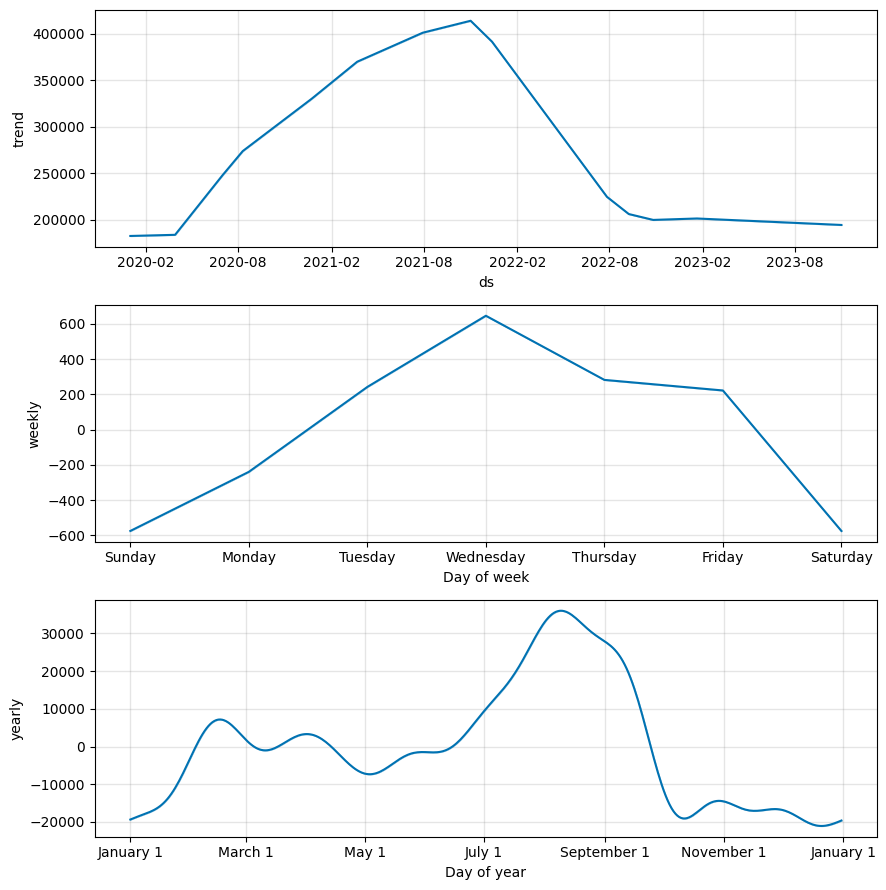

In [26]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [31]:
forecast = m.predict(future)
# 다음날 예측값 출력
next_day_forecast = forecast[['ds', 'yhat']].tail(1)
print("다음 날의 예측값:", next_day_forecast['yhat'].values[0])

다음 날의 예측값: 179531.28107126418
